<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

#  4.1 선형 회귀(Linear Regression)

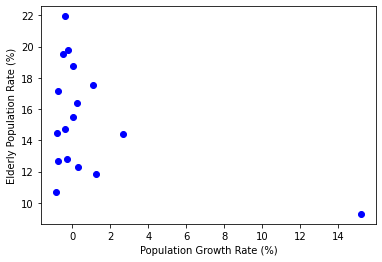

In [3]:
# 4.1 지역별 인구증가율과 고령인구비율 시각화
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

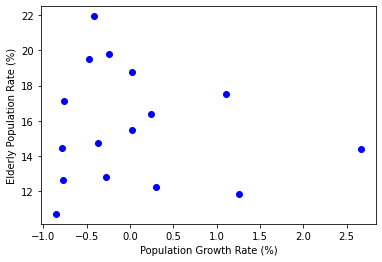

In [4]:
# 4.2 지역별 인구증가율과 고령인구비율 시각화: 극단치 제거
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

a: -0.355834147915461 b: 15.669317743971302


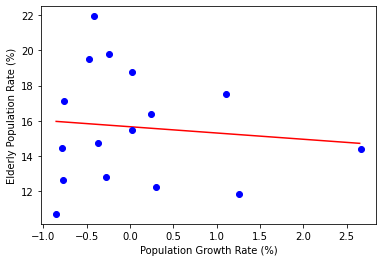

In [5]:
# 4.3 최소제곱법으로 회귀선 구하기
import numpy as np
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균을 구합니다.
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a, b를 구합니다.
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선을 그립니다.
plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: 0.13224566 b: 6.471549 loss: 94.18352
199 a: -0.10803597 b: 11.005038 loss: 31.485842
299 a: -0.25040153 b: 13.684703 loss: 13.710363
399 a: -0.31871954 b: 14.970682 loss: 10.267763
499 a: -0.3450786 b: 15.466862 loss: 9.821697
599 a: -0.35327843 b: 15.621211 loss: 9.783113
699 a: -0.3553399 b: 15.660012 loss: 9.780891
799 a: -0.35575655 b: 15.667866 loss: 9.780806
899 a: -0.3558245 b: 15.669138 loss: 9.780804
999 a: -0.3558333 b: 15.669302 loss: 9.780805


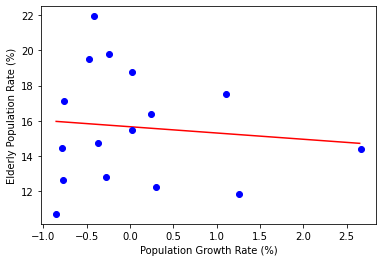

In [6]:
# 4.4 텐서플로를 이용해서 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 4.2 다항 회귀(Polynomial Regression)

99 a: 3.94363 b: -5.672094 c: 6.5603857 loss: 67.41579
199 a: 2.6957746 b: -4.532514 c: 10.452158 loss: 30.400719
299 a: 1.198162 b: -2.2468543 c: 13.07526 loss: 15.483669
399 a: 0.26310518 b: -0.80204433 c: 14.677786 loss: 10.7870865
499 a: -0.22415282 b: -0.04950534 c: 15.514173 loss: 9.681382
599 a: -0.442138 b: 0.28712732 c: 15.888464 loss: 9.48527
699 a: -0.5261823 b: 0.4169158 c: 16.032778 loss: 9.458984
799 a: -0.5541436 b: 0.4600952 c: 16.080791 loss: 9.456326
899 a: -0.56216276 b: 0.47247794 c: 16.094564 loss: 9.456123
999 a: -0.56413496 b: 0.47552392 c: 16.09795 loss: 9.456112


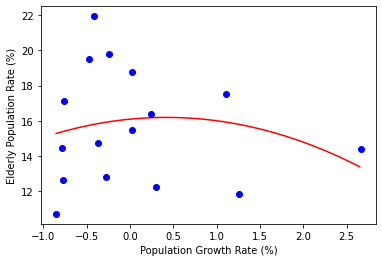

In [7]:
# 4.5 텐서플로우를 이용해서 2차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X + b * X + c
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: -1.3060147 b: 6.151031 c: -3.6923194 d: 6.395142 loss: 62.27392
199 a: -2.0323253 b: 6.956074 c: -2.2857811 d: 9.927447 loss: 30.853424
299 a: -1.692358 b: 5.189644 c: -0.94978887 d: 12.084092 loss: 20.187614
399 a: -0.9492968 b: 2.847811 c: -0.561829 d: 13.599178 loss: 14.286735
499 a: -0.23589264 b: 0.7592883 c: -0.46369275 d: 14.737966 loss: 10.945225
599 a: 0.323811 b: -0.8565514 c: -0.42523426 d: 15.585071 loss: 9.246593
699 a: 0.72430897 b: -2.0098987 c: -0.40248254 d: 16.18501 loss: 8.477057
799 a: 0.9923194 b: -2.7813296 c: -0.3878621 d: 16.585583 loss: 8.165847
899 a: 1.1609383 b: -3.266616 c: -0.37875736 d: 16.837452 loss: 8.053453
999 a: 1.2607865 b: -3.5539703 c: -0.37338352 d: 16.98657 loss: 8.017239


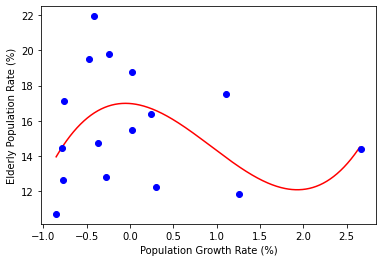

In [8]:
# 4.6 텐서플로우를 이용해서 3차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c, d를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X*X + b * X*X + c * X + d
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c,d])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 4.3 딥러닝 네트워크를 이용한 회귀

In [9]:
# 4.7 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 4.8 딥러닝 네트워크의 학습
model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 849us/step - loss: 256.7762
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 130.1087
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 12.8134
Epoch 4/10
1/1 [==============================] - 0s 814us/step - loss: 9.4566
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 9.2508
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 9.1922
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 9.1447
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 9.0978
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 9.0511
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 9.0045


In [11]:
# 4.9 딥러닝 네트워크의 Y값 예측
model.predict(X)

array([[16.217999],
       [15.331625],
       [14.816326],
       [16.270876],
       [15.067665],
       [16.247412],
       [16.126652],
       [15.862555],
       [15.351421],
       [15.992325],
       [15.188819],
       [15.943085],
       [16.09923 ],
       [16.268955],
       [15.371059],
       [13.924105]], dtype=float32)

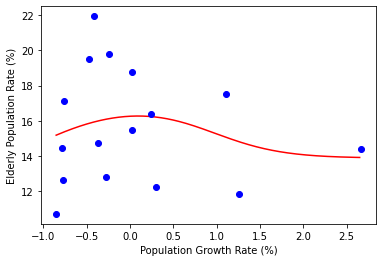

In [12]:
# 4.10 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

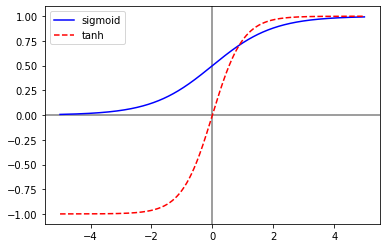

In [13]:
# 그림 4.2 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

# 4.4 보스턴 주택 가격 데이터세트(Boston Housing Dataset)

In [14]:
# 4.11 데이터 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [15]:
# 4.12 데이터 전처리(정규화)
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [16]:
# 4.13 Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_3 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


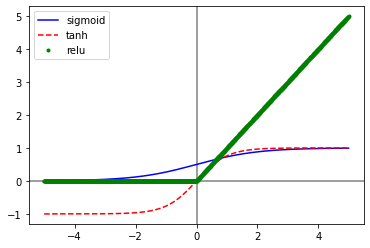

In [17]:
# 그림 4.5 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [18]:
# 4.14 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 20ms/step - loss: 1.6416 - val_loss: 1.1239
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.5727 - val_loss: 0.7816
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.3356 - val_loss: 0.3605
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2689 - val_loss: 0.2766
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2298 - val_loss: 0.2447
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1966 - val_loss: 0.2290
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1684 - val_loss: 0.3756
Epoch 8/25
10/10 [==============================] - 0s 7ms/step - loss: 0.1990 - val_loss: 0.3812
Epoch 9/25
10/10 [==============================] - 0s 8ms/step - loss: 0.1692 - val_loss: 0.3126
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1473 - val_loss: 0.1896
Epoch 11/25
10/10 

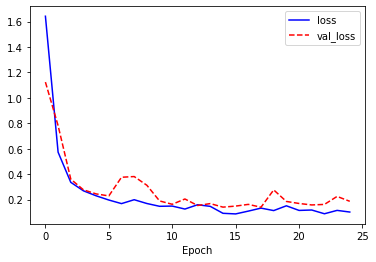

In [19]:
# 4.15 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [20]:
# 4.16 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.1826


0.18255099654197693

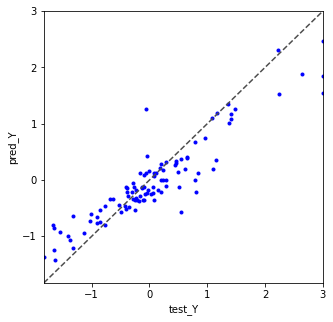

In [21]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [26]:
[min(test_Y), max(test_Y)]

[-1.825740279496296, 3.0008527225512145]

In [27]:
[min(test_Y), max(test_Y)]

[-1.825740279496296, 3.0008527225512145]

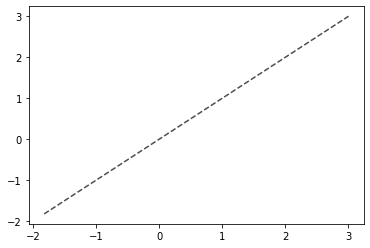

In [28]:
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")

In [22]:
# 4.18 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 12ms/step - loss: 3.3090 - val_loss: 1.2370
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.7976 - val_loss: 1.0959
Epoch 3/25
10/10 [==============================] - 0s 4ms/step - loss: 0.6556 - val_loss: 0.8133
Epoch 4/25
10/10 [==============================] - 0s 4ms/step - loss: 0.3872 - val_loss: 0.5533
Epoch 5/25
10/10 [==============================] - 0s 4ms/step - loss: 0.3033 - val_loss: 0.4393
Epoch 6/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2618 - val_loss: 0.4358
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2558 - val_loss: 0.4952
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2641 - val_loss: 0.3756
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2123 - val_loss: 0.3538
Epoch 10/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2080 - val_loss: 0.3614
Epoch 11/25
10/10 

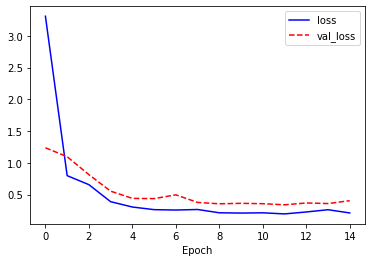

In [23]:
# 4.19 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [24]:
# 4.20 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.1990


0.19895239174365997

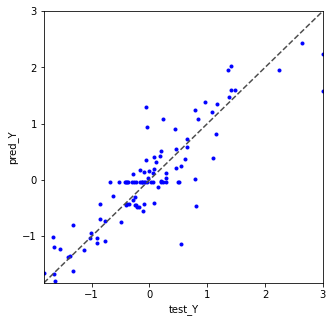

In [25]:
# 4.21 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()